In [1]:
import pandas as pd
import os

# Task 1: Merging 12 months of sales data into a single csv file

In [2]:
df = pd.read_csv('.\SalesData\Sales_April_2019.csv')
files = [file for file in os.listdir('.\SalesData')]

MergedData = pd.DataFrame()

for file in files:
    df = pd.read_csv('.\SalesData/'+file)
    MergedData = pd.concat([MergedData, df])

MergedData.to_csv("mergedalldata.csv", index=False)

### Reading the data in newly created dataframe

In [3]:
merged_data = pd.read_csv('mergedalldata.csv')
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


# Data cleaning

### There were some columns that had the values of 'NaN', which were not useful during analysis. 
### So, those values were removed during cleanup. 

### Removing the rows of NaN

In [4]:
NaN_df = merged_data[merged_data.isna().any(axis=1)]
NaN_df.head()

merged_data = merged_data.dropna(how= 'all')
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


## Find 'O' and delete it. There were some texts that needed to be removed.

In [5]:
merged_data = merged_data[merged_data['Order Date'].str[0:1] != 'O']
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


### Convert columns to the correct type

In [6]:
merged_data['Quantity Ordered'] = pd.to_numeric(merged_data['Quantity Ordered'])    # make int
merged_data['Price Each']= pd.to_numeric(merged_data['Price Each'])# make float

### Augmenting data with additional columns like month, hour, minute

# Task 2: Add month column

In [7]:
# merged data order date have inconsistent formatting for month.
# some month are 4 and some are 09. Changing the order date to datetime
# format makes it easier to get the months.

merged_data["Order Date"] = pd.to_datetime(merged_data["Order Date"])

In [8]:
merged_data['Month'] = merged_data['Order Date'].dt.month
merged_data['Month'] = merged_data['Month'].astype('int32')

# check we have all months.

set(list(merged_data['Month']))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [9]:
merged_data['Order Date']

0        2019-04-19 08:46:00
1        2019-04-07 22:30:00
2        2019-04-12 14:38:00
3        2019-04-12 14:38:00
4        2019-04-30 09:27:00
                 ...        
186844   2019-09-17 20:56:00
186845   2019-09-01 16:00:00
186846   2019-09-23 07:39:00
186847   2019-09-19 17:30:00
186848   2019-09-30 00:18:00
Name: Order Date, Length: 185950, dtype: datetime64[ns]

# Task 3: Add a Sales column

In [10]:
merged_data['Sales'] = merged_data['Quantity Ordered']* merged_data['Price Each']
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


## Task 4: Add a city column

In [11]:
# Using .apply() method
# Defining function to extract city from the Purchase address

def city_fn(address):
    return address.split(',')[1]

def state_fn(address):
    return address.split(',')[2].split(' ')[1]

merged_data['City'] = merged_data['Purchase Address'].apply(lambda x: x.split(',')[1] + ' ('+ state_fn(x) + ')')
# merged_data['City'] = merged_data['Purchase Address'].apply(lambda x: f"{city_fn(x)} ({state_fn(x)})")

merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Question 1: What was the best month for sales? How much was earned that month?

In [12]:
calculation = merged_data.groupby('Month').sum()

Text(0, 0.5, 'Sales in USD (in 10^6)')

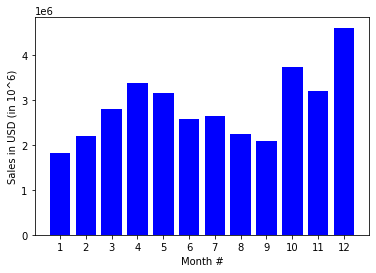

In [13]:
import matplotlib.pyplot as plt

months = range(1, 13)
plt.bar(months, calculation['Sales'], color='blue')
plt.xticks(months)
plt.xlabel('Month #')
plt.ylabel('Sales in USD (in 10^6)')

### Conclusion: The best month for Sales is December. It might be because we have Christmas on December, and people buy gifts to their loved ones.

### Question 2: What city has the highest number of sales?

In [14]:
calculation = merged_data.groupby('City').sum()

In [15]:
calculation

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


Text(0, 0.5, 'Sales in USD (in 10^6)')

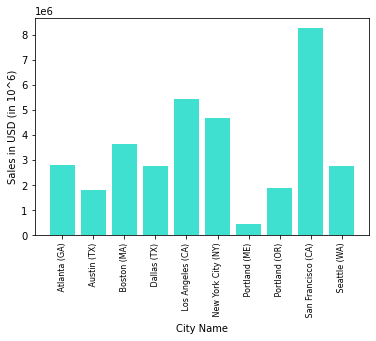

In [16]:
import matplotlib.pyplot as plt

cities = [City for City, df in merged_data.groupby('City')]

plt.bar(cities, calculation['Sales'], color = 'turquoise')
plt.xticks(cities, rotation= 'vertical', size =8)
plt.xlabel('City Name')
plt.ylabel('Sales in USD (in 10^6)')


### Conclusion: Looking at the histogram, we can see San Fransico has the highest number of sales.

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [17]:
merged_data['Hour'] = merged_data['Order Date'].dt.hour
merged_data['Minute'] = merged_data['Order Date'].dt.minute

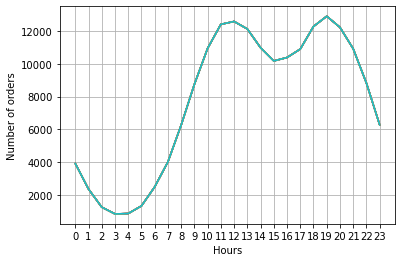

In [18]:
hours = [hour for hour, df in merged_data.groupby('Hour')]

plt.plot(hours, merged_data.groupby(['Hour']).count())

plt.xticks(hours)
plt.grid()
plt.xlabel("Hours")
plt.ylabel("Number of orders")
plt.show()

### Conclusion: The best time to put the advertisement to increase the likelihood of customer's buying product are 11 AM or 7 PM.

### Question 4: What poducts are most often sold together?

In [19]:
df = merged_data[merged_data['Order ID'].duplicated(keep=False)]

df['Items_sold_together'] = df.groupby('Order ID')['Product'].transform(lambda x: ';'.join(x))

df2 = df[['Order ID', 'Items_sold_together']].drop_duplicates()

df2.head()

<ipython-input-19-86030afb0142>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Items_sold_together'] = df.groupby('Order ID')['Product'].transform(lambda x: ';'.join(x))


,Order ID,Items_sold_together
2,176560,Google Phone;Wired Headphones
17,176574,Google Phone;USB-C Charging Cable
29,176585,Bose SoundSport Headphones;Bose SoundSport Hea...
31,176586,AAA Batteries (4-pack);Google Phone
118,176672,Lightning Charging Cable;USB-C Charging Cable


In [20]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Items_sold_together']:
    row_list = row.split(';')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)
    


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Conclusion: The list of the products that are most often sold together are listed above. Among them, the best pair is iPhone and Lightning Charging cable

### Question 5: What product sold the most? Why do you think it sold the most?

In [21]:
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


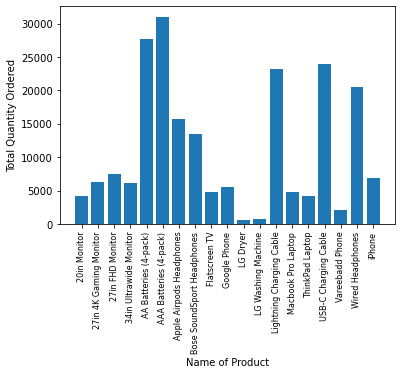

In [22]:
Product_list = merged_data.groupby('Product')
Total_Quantity_ordered = Product_list.sum()['Quantity Ordered']

product = [product for product, df in Product_list]

plt.bar(product, Total_Quantity_ordered)
plt.xticks(product, rotation='vertical', size =8)
plt.ylabel('Total Quantity Ordered')
plt.xlabel('Name of Product')
plt.show()

<ipython-input-23-feeed9827526>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product, rotation ='vertical', size =8)


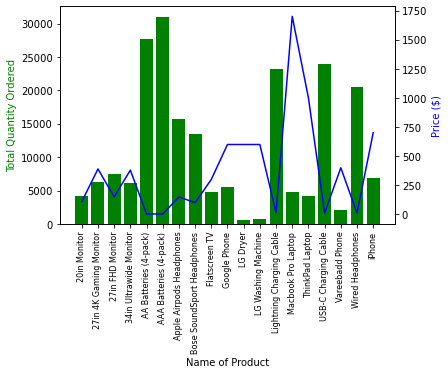

In [23]:
prices_of_product = merged_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product, Total_Quantity_ordered, color='g')
ax2.plot(product, prices_of_product, 'b-')

ax1.set_xlabel('Name of Product')
ax1.set_ylabel ('Total Quantity Ordered', color = 'g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(product, rotation ='vertical', size =8)

plt.show()

#### Conclusion: Thee product that sold the most is AAA batteries and that sold the least is LG Dryer. The price might be one of the reason for this number of sales for both.